## Predicting Diabetes Risk with Deep Learning

In [32]:
#import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model


In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",
                 names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])




In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [37]:
#extract X and y features
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [38]:
X.shape[1]

8

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [41]:
#train model function

def train_model(X,y,X_val, y_val,input_dim):
    model = Sequential()
    model.add(Dense(64, activation = "relu",input_shape= input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer= Adam(), loss= "binary_crossentropy",metrics=[
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ])
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True)

    class_weights = {
    0: (1 / np.bincount(y_train)[0]),
    1: (1 / np.bincount(y_train)[1])
     }

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop, checkpoint],
        class_weight=class_weights,
        verbose=1
    )

    return model, history


    


    
    

In [42]:
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=30)




In [43]:
X_subtrain.shape

(552, 8)

In [44]:
# Train model
input_dim= (X.shape[1],)
model, history = train_model(X_subtrain, y_subtrain, X_val, y_val,input_dim)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/20 ━━━━━━━━━━━━━━━━━━━━ 17s 944ms/step - auc: 0.4615 - loss: 0.0024 - precision: 0.3810 - recall: 0.6154

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc: 0.5040 - loss: 0.0023 - precision: 0.3405 - recall: 0.6378 - val_auc: 0.7631 - val_loss: 0.6755 - val_precision: 0.4545 - val_recall: 0.9524
Epoch 2/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.6667 - loss: 0.0022 - precision: 0.4286 - recall: 0.7500

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.6841 - loss: 0.0022 - precision: 0.4636 - recall: 0.8119 - val_auc: 0.8304 - val_loss: 0.6418 - val_precision: 0.5294 - val_recall: 0.8571
Epoch 3/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7083 - loss: 0.0021 - precision: 0.5000 - recall: 0.6429

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7567 - loss: 0.0020 - precision: 0.5132 - recall: 0.7752 - val_auc: 0.8496 - val_loss: 0.5920 - val_precision: 0.6429 - val_recall: 0.8571
Epoch 4/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8939 - loss: 0.0017 - precision: 0.5789 - recall: 1.0000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8142 - loss: 0.0018 - precision: 0.6075 - recall: 0.7816 - val_auc: 0.8618 - val_loss: 0.5261 - val_precision: 0.7083 - val_recall: 0.8095
Epoch 5/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.9020 - loss: 0.0016 - precision: 0.9000 - recall: 0.6000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8055 - loss: 0.0018 - precision: 0.6667 - recall: 0.6257 - val_auc: 0.8653 - val_loss: 0.4954 - val_precision: 0.7083 - val_recall: 0.8095
Epoch 6/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7773 - loss: 0.0017 - precision: 0.7778 - recall: 0.7000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.7904 - loss: 0.0018 - precision: 0.6263 - recall: 0.6559 - val_auc: 0.8722 - val_loss: 0.4786 - val_precision: 0.7083 - val_recall: 0.8095
Epoch 7/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.7240 - loss: 0.0020 - precision: 0.4286 - recall: 0.7500

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8121 - loss: 0.0017 - precision: 0.6302 - recall: 0.7364 - val_auc: 0.8763 - val_loss: 0.4747 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 8/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.8636 - loss: 0.0017 - precision: 0.6667 - recall: 0.8000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8533 - loss: 0.0016 - precision: 0.6466 - recall: 0.7987 - val_auc: 0.8821 - val_loss: 0.4464 - val_precision: 0.7083 - val_recall: 0.8095
Epoch 9/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9059 - loss: 0.0014 - precision: 0.8235 - recall: 0.8235

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8453 - loss: 0.0016 - precision: 0.6565 - recall: 0.7584 - val_auc: 0.8879 - val_loss: 0.4518 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 10/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.7877 - loss: 0.0018 - precision: 0.8182 - recall: 0.6429

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8390 - loss: 0.0016 - precision: 0.6889 - recall: 0.7584 - val_auc: 0.8902 - val_loss: 0.4417 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 11/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.8057 - loss: 0.0016 - precision: 0.3636 - recall: 0.5714

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8276 - loss: 0.0016 - precision: 0.5910 - recall: 0.7311 - val_auc: 0.8961 - val_loss: 0.4384 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 12/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.7240 - loss: 0.0019 - precision: 0.3333 - recall: 0.5000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8317 - loss: 0.0016 - precision: 0.5873 - recall: 0.6961 - val_auc: 0.8961 - val_loss: 0.4289 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8177 - loss: 0.0017 - precision: 0.6167 - recall: 0.7207 - val_auc: 0.8943 - val_loss: 0.4325 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 14/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.6883 - loss: 0.0025 - precision: 0.5000 - recall: 0.4545

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8101 - loss: 0.0018 - precision: 0.6387 - recall: 0.7484 - val_auc: 0.8966 - val_loss: 0.4269 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 15/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8424 - loss: 0.0016 - precision: 0.6398 - recall: 0.7631 - val_auc: 0.8955 - val_loss: 0.4167 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 16/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8300 - loss: 0.0015 - precision: 0.6250 - recall: 0.7692

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8230 - loss: 0.0017 - precision: 0.6095 - recall: 0.7269 - val_auc: 0.9001 - val_loss: 0.4104 - val_precision: 0.6800 - val_recall: 0.8095
Epoch 17/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - auc: 0.7614 - loss: 0.0017 - precision: 0.7500 - recall: 0.6000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8464 - loss: 0.0016 - precision: 0.6494 - recall: 0.7472 - val_auc: 0.9053 - val_loss: 0.4060 - val_precision: 0.7083 - val_recall: 0.8095
Epoch 18/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - auc: 0.8030 - loss: 0.0018 - precision: 0.5833 - recall: 0.6364

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8347 - loss: 0.0016 - precision: 0.6350 - recall: 0.7810 - val_auc: 0.9077 - val_loss: 0.4081 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 19/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.9352 - loss: 0.0012 - precision: 0.8000 - recall: 0.9231

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8363 - loss: 0.0016 - precision: 0.6274 - recall: 0.7722 - val_auc: 0.9106 - val_loss: 0.4033 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 20/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8402 - loss: 0.0016 - precision: 0.6330 - recall: 0.7832 - val_auc: 0.9100 - val_loss: 0.4079 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 21/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9205 - loss: 0.0013 - precision: 0.7143 - recall: 1.0000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8541 - loss: 0.0015 - precision: 0.6564 - recall: 0.8073 - val_auc: 0.9135 - val_loss: 0.3996 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 22/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8365 - loss: 0.0016 - precision: 0.5966 - recall: 0.8050 - val_auc: 0.9117 - val_loss: 0.4205 - val_precision: 0.6786 - val_recall: 0.9048
Epoch 23/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8588 - loss: 0.0017 - precision: 0.8000 - recall: 0.8000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8590 - loss: 0.0016 - precision: 0.7054 - recall: 0.8334 - val_auc: 0.9158 - val_loss: 0.4018 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 24/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8500 - loss: 0.0016 - precision: 0.6429 - recall: 0.7500

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8473 - loss: 0.0016 - precision: 0.6216 - recall: 0.7785 - val_auc: 0.9175 - val_loss: 0.3947 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 25/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.6625 - loss: 0.0023 - precision: 0.4375 - recall: 0.5833

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8313 - loss: 0.0017 - precision: 0.6290 - recall: 0.8184 - val_auc: 0.9193 - val_loss: 0.3978 - val_precision: 0.7200 - val_recall: 0.8571
Epoch 26/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8640 - loss: 0.0015 - precision: 0.6628 - recall: 0.8558 - val_auc: 0.9181 - val_loss: 0.3971 - val_precision: 0.7200 - val_recall: 0.8571
Epoch 27/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.7835 - loss: 0.0018 - precision: 0.6154 - recall: 0.7273

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8494 - loss: 0.0016 - precision: 0.6435 - recall: 0.8003 - val_auc: 0.9204 - val_loss: 0.4036 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 28/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8452 - loss: 0.0016 - precision: 0.6197 - recall: 0.8182 - val_auc: 0.9187 - val_loss: 0.3958 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 29/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8525 - loss: 0.0016 - precision: 0.6286 - recall: 0.7947 - val_auc: 0.9181 - val_loss: 0.3862 - val_precision: 0.7200 - val_recall: 0.8571
Epoch 30/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.9455 - loss: 0.0011 - precision: 0.5625 - recall: 0.9000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8689 - loss: 0.0015 - precision: 0.6596 - recall: 0.7970 - val_auc: 0.9233 - val_loss: 0.3849 - val_precision: 0.7500 - val_recall: 0.8571
Epoch 31/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8588 - loss: 0.0017 - precision: 0.8000 - recall: 0.8000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8593 - loss: 0.0015 - precision: 0.6728 - recall: 0.8402 - val_auc: 0.9251 - val_loss: 0.3888 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 32/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8174 - loss: 0.0017 - precision: 0.5715 - recall: 0.7424 - val_auc: 0.9210 - val_loss: 0.3871 - val_precision: 0.7600 - val_recall: 0.9048
Epoch 33/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8725 - loss: 0.0015 - precision: 0.6321 - recall: 0.8308 - val_auc: 0.9251 - val_loss: 0.3781 - val_precision: 0.7600 - val_recall: 0.9048
Epoch 34/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8599 - loss: 0.0015 - precision: 0.6825 - recall: 0.8096 - val_auc: 0.9233 - val_loss: 0.3748 - val_precision: 0.8182 - val_recall: 0.8571
Epoch 35/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8827 - loss: 0.0014 - precision: 0.7100 - recall: 0.8504 - val_auc: 0.9204 - val_loss: 0.3799 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 36/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8610 - loss: 0.0015 - precision: 0.6581 - recall: 0.8325 - val_auc: 0.9262 - val_loss: 0.3682 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 37/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9069 - loss: 0.0014 - precision: 0.7333 - recall: 0.8462

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8595 - loss: 0.0015 - precision: 0.6485 - recall: 0.8037 - val_auc: 0.9280 - val_loss: 0.3640 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 38/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8749 - loss: 0.0014 - precision: 0.6772 - recall: 0.7496 - val_auc: 0.9257 - val_loss: 0.3674 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 39/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8802 - loss: 0.0013 - precision: 0.6250 - recall: 0.6250

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8684 - loss: 0.0014 - precision: 0.6512 - recall: 0.8167 - val_auc: 0.9280 - val_loss: 0.3721 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 40/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.9182 - loss: 0.0010 - precision: 0.6923 - recall: 0.9000

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8928 - loss: 0.0013 - precision: 0.6682 - recall: 0.8130 - val_auc: 0.9286 - val_loss: 0.3701 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 41/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8880 - loss: 0.0014 - precision: 0.6796 - recall: 0.8447 - val_auc: 0.9233 - val_loss: 0.4013 - val_precision: 0.6786 - val_recall: 0.9048
Epoch 42/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8677 - loss: 0.0015 - precision: 0.6409 - recall: 0.8331 - val_auc: 0.9257 - val_loss: 0.3881 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 43/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8775 - loss: 0.0014 - precision: 0.6284 - recall: 0.8321 - val_auc: 0.9280 - val_loss: 0.3745 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 44/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8438 - loss: 0.0014 - precision: 0.6250 - recall: 0.6250

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8508 - loss: 0.0015 - precision: 0.6219 - recall: 0.7676 - val_auc: 0.9292 - val_loss: 0.3741 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 45/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8736 - loss: 0.0014 - precision: 0.6476 - recall: 0.8085 - val_auc: 0.9268 - val_loss: 0.3731 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 46/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8763 - loss: 0.0014 - precision: 0.6747 - recall: 0.8254 - val_auc: 0.9292 - val_loss: 0.3633 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 47/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8514 - loss: 0.0016 - precision: 0.6396 - recall: 0.8161 - val_auc: 0.9239 - val_loss: 0.3733 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 48/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8676 - loss: 0.0015 - precision: 0.6506 - recall: 0.8032 - val_auc: 0.9292 - val_loss: 0.3645 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 49/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8671 - loss: 0.0015 - precision: 0.6909 - recall: 0.8242 - val_auc: 0.9292 - val_loss: 0.3688 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 50/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8779 - loss: 0.0014 - precision: 0.6696 - recall: 0.8328 - val_auc: 0.9274 - val_loss: 0.3625 - val_precision: 0.7200 - val_recall: 0.8571
Epoch 51/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8898 - loss: 0.0013 - precision: 0.6679 - recall: 0.7912 - val_auc: 0.9262 - val_loss: 0.3607 - val_precision: 0.7083 - val_recall: 0.8095
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8775 - loss: 0.0014 - precision: 0.6502 - recall: 0.7525 - val_auc: 0.9268 - val_loss: 0.3625 - val_precision: 0.7200 - val_recall: 0.8571
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8950 - loss: 0.0014 - precision: 0.7218 - recall: 0.8380 - val_auc: 0.9222 - val_loss: 0.3714 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 54/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8935 - loss: 0.0013 - precision: 0.6729 - recall: 0.8320 - val_auc: 0.9309 - val_loss: 0.3666 - val_precision: 0.6786 - val_recall: 0.9048
Epoch 66/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8745 - loss: 0.0015 - precision: 0.6667 - recall: 0.7692

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8788 - loss: 0.0014 - precision: 0.6390 - recall: 0.8396 - val_auc: 0.9332 - val_loss: 0.3552 - val_precision: 0.7600 - val_recall: 0.9048
Epoch 67/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8794 - loss: 0.0014 - precision: 0.6884 - recall: 0.8107 - val_auc: 0.9309 - val_loss: 0.3459 - val_precision: 0.7917 - val_recall: 0.9048
Epoch 68/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8760 - loss: 0.0014 - precision: 0.6047 - recall: 0.8441 - val_auc: 0.9274 - val_loss: 0.3506 - val_precision: 0.7917 - val_recall: 0.9048
Epoch 69/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8907 - loss: 0.0013 - precision: 0.6880 - recall: 0.8582 - val_auc: 0.9268 - val_loss: 0.3591 - val_precision: 0.6786 - val_recall: 0.9048
Epoch 70/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8762 - loss: 0.0014 - precision: 0.6429 - recall: 0.8252 - val_auc: 0.9228 - val_loss: 0.3505 - val_precision: 0.7500 - val_recall: 0.8571
Epoch 71/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8685 - loss: 0.0015 - precision: 0.6656 - recall: 0.8343 - val_auc: 0.9332 - val_loss: 0.3401 - val_precision: 0.7600 - val_recall: 0.9048
Epoch 78/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8925 - loss: 0.0014 - precision: 0.7247 - recall: 0.8430 - val_auc: 0.9315 - val_loss: 0.3357 - val_precision: 0.7917 - val_recall: 0.9048
Epoch 79/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8618 - loss: 0.0015 - precision: 0.6604 - recall: 0.8021 - val_auc: 0.9297 - val_loss: 0.3423 - val_precision: 0.7600 - val_recall: 0.9048
Epoch 80/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8734 - loss: 0.0014 - precision: 0.6781 - recall: 0.8198 - val_auc: 0.9321 - val_loss: 0.3497 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 81/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8993 - loss: 0.0013 - precision: 0.6713 - recall: 0.8727 - val_auc: 0.9332 - val_loss: 0.3403 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 82/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9014 - loss: 0.0013 - precision: 0.6604 - recall: 0.8648 - val_auc: 0.9361 - val_loss: 0.3306 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 83/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8885 - loss: 0.0014 - precision: 0.6803 - recall: 0.8339 - val_auc: 0.9315 - val_loss: 0.3366 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 84/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8823 - loss: 0.0014 - precision: 0.6937 - recall: 0.8236 - val_auc: 0.9315 - val_loss: 0.3416 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 85/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8825 - loss: 0.0014 - precision: 0.6597 - recall: 0.8424 - val_auc: 0.9321 - val_loss: 0.3384 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 86/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8917 - loss: 0.0014 - precision: 0.6920 - recall: 0.8479 - val_auc: 0.9326 - val_loss: 0.3394 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 87/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9002 - loss: 0.0013 - precision: 0.7261 - recall: 0.8828 - val_auc: 0.9373 - val_loss: 0.3397 - val_precision: 0.7037 - val_recall: 0.9048
Epoch 90/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8882 - loss: 0.0014 - precision: 0.6629 - recall: 0.8390 - val_auc: 0.9373 - val_loss: 0.3329 - val_precision: 0.7308 - val_recall: 0.9048
Epoch 91/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8932 - loss: 0.0013 - precision: 0.6810 - recall: 0.8514 - val_auc: 0.9367 - val_loss: 0.3464 - val_precision: 0.6786 - val_recall: 0.9048
Epoch 92/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8965 - loss: 0.0013 - precision: 0.7004 - recall: 0.8633 - val_auc: 0.9350 - val_loss: 0.3295 - val_precision: 0.7500 - val_recall: 0.8571
Epoch 93/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.9031 - loss: 0.0013 - precision: 0.6884 - recall: 0.8680 - val_auc: 0.9338 - val_loss: 0.3356 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 94/100


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.8928 - loss: 0.0014 - precision: 0.6776 - recall: 0.8564 - val_auc: 0.9384 - val_loss: 0.3338 - val_precision: 0.6923 - val_recall: 0.8571
Epoch 99/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - auc: 0.8994 - loss: 0.0013 - precision: 0.6796 - recall: 0.8504 - val_auc: 0.9361 - val_loss: 0.3351 - val_precision: 0.6786 - val_recall: 0.9048
Epoch 100/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.8528 - loss: 0.0016 - precision: 0.6667 - recall: 0.7273

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc: 0.9084 - loss: 0.0013 - precision: 0.6914 - recall: 0.8420 - val_auc: 0.9431 - val_loss: 0.3305 - val_precision: 0.6786 - val_recall: 0.9048


In [23]:
history.history

{'auc': [0.5919979810714722,
  0.7411848306655884,
  0.7461194396018982,
  0.7699066400527954,
  0.7956746816635132,
  0.8054976463317871,
  0.8191490173339844,
  0.8172203898429871,
  0.8300493359565735,
  0.8244370222091675,
  0.8400750756263733,
  0.83278888463974,
  0.8377177715301514,
  0.8388587832450867,
  0.8354358077049255,
  0.8579545617103577,
  0.8333333730697632,
  0.8483458161354065,
  0.8467183113098145,
  0.8433300852775574,
  0.8466488122940063,
  0.8522495627403259,
  0.8544967770576477,
  0.8449575901031494,
  0.8571668863296509,
  0.849266767501831,
  0.8504135608673096,
  0.8581398725509644,
  0.853610634803772,
  0.8578908443450928,
  0.845745325088501,
  0.8550354242324829,
  0.8547168970108032,
  0.8586496114730835,
  0.855371356010437,
  0.8581862449645996,
  0.8679165840148926,
  0.8584932088851929,
  0.8645341396331787,
  0.858064591884613,
  0.8704765439033508,
  0.871142566204071,
  0.8668913245201111,
  0.8689764738082886,
  0.8594083189964294,
  0.8690227

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       104
           1       0.60      0.72      0.65        50

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.75      0.76       154

ROC AUC: 0.8155769230769231


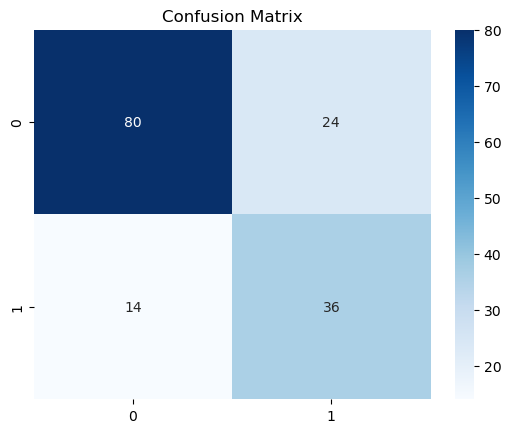

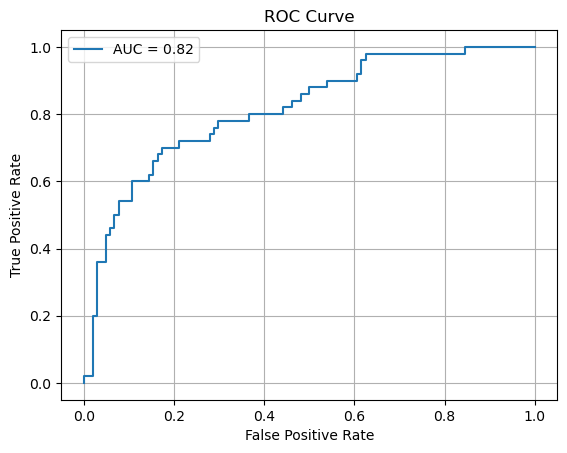

In [45]:
# Predict & Evaluate
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.grid()
plt.show()


In [46]:
best_epoch = np.argmax(history.history['val_auc']) + 1
print(f"Best epoch: {best_epoch}")

Best epoch: 100


In [47]:
y_probs = model.predict(X_test)
thresholds = np.arange(0.1, 0.9, 0.05)

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    print(f"Threshold: {thresh}")
    print(classification_report(y_test, y_pred_thresh))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Threshold: 0.1
              precision    recall  f1-score   support

           0       0.91      0.39      0.55       104
           1       0.42      0.92      0.58        50

    accuracy                           0.56       154
   macro avg       0.67      0.66      0.56       154
weighted avg       0.75      0.56      0.56       154

Threshold: 0.15000000000000002
              precision    recall  f1-score   support

           0       0.90      0.43      0.58       104
           1       0.43      0.90      0.58        50

    accuracy                           0.58       154
   macro avg       0.67      0.67      0.58       154
weighted avg       0.75      0.58      0.58       154

Threshold: 0.20000000000000004
              precision    recall  f1-score   support

           0       0.88      0.51      0.65       104
           1       0.46      0.86      0.60        50

    accuracy                           0.62       154
   macro avg 

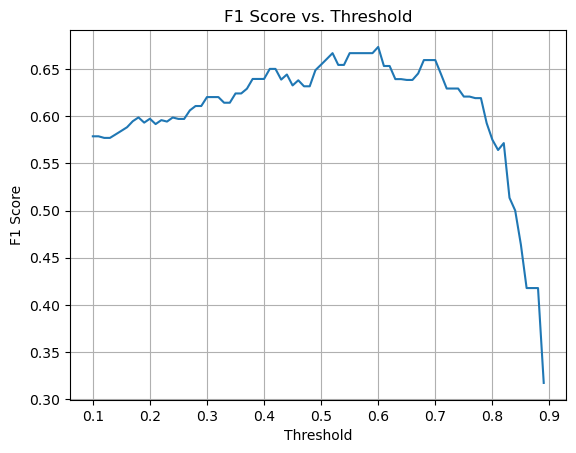

📌 Best threshold based on F1 score: 0.5999999999999998


In [48]:
from sklearn.metrics import f1_score

f1_scores = []
thresholds = np.arange(0.1, 0.9, 0.01)

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

plt.plot(thresholds, f1_scores)
plt.title("F1 Score vs. Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"📌 Best threshold based on F1 score: {best_thresh}")


In [50]:
model.save("diabetes_predictor_model.keras")


In [51]:
model.save("diabetes_predictor_model.h5")